

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 31)]              0         
                                                                 
 dense (Dense)               (None, 8)                 256       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 8)                 40        
                                                                 
 dense_3 (Dense)             (None, 31)                279       
                                                                 
Total params: 611 (2.39 KB)
Trainable params: 611 (2.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20


8011/8011 [=====

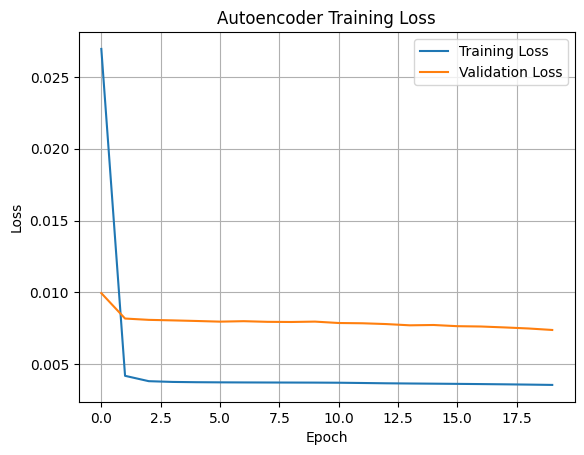

In [1]:
# ------------------------------------------------------
# a. Import Required Libraries
# ------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# ------------------------------------------------------
# b. Upload / Access the Dataset
# ------------------------------------------------------
data = pd.read_csv("C:/Users/UMESH/OneDrive/Desktop/creditcard.csv")

X = data.values

# Normalize
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------------------------
# c. Encoder: Convert Input to Latent Space
# ------------------------------------------------------
input_dim = X_scaled.shape[1]
latent_dim = 4

input_layer = Input(shape=(input_dim,))
encoder_layer1 = Dense(8, activation='relu')(input_layer)
encoder_output = Dense(latent_dim, activation='relu')(encoder_layer1)

# ------------------------------------------------------
# d. Decoder: Reconstruct the Input
# ------------------------------------------------------
decoder_layer1 = Dense(8, activation='relu')(encoder_output)
decoder_output = Dense(input_dim, activation='sigmoid')(decoder_layer1)

# Full model
autoencoder = Model(inputs=input_layer, outputs=decoder_output)

# ------------------------------------------------------
# e. Compile the Model (Optimizer, Loss, Metrics)
# ------------------------------------------------------
autoencoder.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='mse',
    metrics=['mae']
)

autoencoder.summary()

# ------------------------------------------------------
# Train the Autoencoder
# ------------------------------------------------------
history = autoencoder.fit(
    X_scaled, X_scaled,
    epochs=20,
    batch_size=32,
    validation_split=0.1
)

# ------------------------------------------------------
# Plot Training Loss (Final Result Graph)
# ------------------------------------------------------
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Autoencoder Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
